---
# Support Vector Machine, SVM
---

## Inicialization
______

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


import sys
TD_DIR = '/content/gdrive/My Drive/ENSTA/MI201/2022_11_24/'
sys.path.append(TD_DIR)


from sklearn import svm
import random
import numpy as np
import matplotlib.pyplot as plt
import td_util as utils

In [2]:
class Model:
    name = None
    xTrain = None
    yTrain = None
    xTest = None
    yTest = None

    def __init__(self, name, xTrain, yTrain, xTest, yTest):
        self.name = name
        self.xTrain = xTrain
        self.yTrain = yTrain
        self.xTest = xTest
        self.yTest = yTest

    def __str__(self):
        return f"name: {self.name}"

    def getData(self) -> any:
        return self.xTrain, self.yTrain, self.xTest, self.yTest

## Visualization
---

In [ ]:
def createModel(data:any, noise: any) -> Model:
    xTrain, yTrain, xTest, yTest = utils.generate_data(data, noise=noise)
    model = Model(data, xTrain, yTrain, xTest, yTest)

    return model


def plotDist(x:any, y:any, title:str = 'plot') -> None:

    plt.figure()
    utils.show_data_2D(x, y)
    plt.title(title)
    plt.show()


for i in [0, 1, 2, 3]:
    model = createModel(i, 0)

    plotDist(model.xTrain, model.yTrain, f"d: {i}")

## Trainning
---

### Basic 
>```
..., kernel = 'linear', noise=0)...
```

In [ ]:
def plotData(x:any, y:any, svc:any, title:str = 'plot') -> None:

    plt.figure()
    utils.show_data_2D(x, y)
    utils.plot_svc_decision_function(svc)
    plt.title(title)
    plt.show()


def getScore(model:Model) -> float:
    xTrain, yTrain, xTest, yTest = model.getData()

    scoreTrain = svc.score(xTrain, yTrain)
    scoreTest  = svc.score(xTest,  yTest)

    yPredict = svc.predict(xTest)
    sucess   = (yPredict == yTest).sum()
    total    = yTest.shape[0]

    scorePredict = sucess/total

    return scoreTrain, scoreTest, scorePredict

def printScore(title:any, model:Model) -> None:
    sTrain, sTest, sPredict = getScore(model)

    print(f"data: {title}, (sucess, error) %:")
    print(f"\t({sTrain*100:.2f}, {(1-sTrain)*100:.2f}) %")
    print(f"\t({sTest*100:.2f}, {(1-sTest)*100:.2f}) %")
    print(f"\t({sPredict*100:.2f}, {(1-sPredict)*100:.2f}) %")

  

def plotSVC(svc:any, dataSet:list, kernel:str = 'linear', noise:float = 0) -> None:
    for data in dataSet:
        # inicialization
        model = createModel(data, noise)
        xTrain = model.xTrain
        yTrain = model.yTrain

        # trainning
        svc.fit(xTrain, yTrain)

        # visualization
        plotData(xTrain, yTrain, svc, f"d: {data}, k: {kernel}, n: {noise}")
        printScore(data, model)
        


svc = svm.SVC(kernel='linear', max_iter=-1)
plotSVC(svc, [0, 1, 2, 3])

## Analysis
---

### Influence Kernel

In [ ]:
def influenceKernel(kernels:list = ['rbf', 'poly', 'sigmoid']):
    data = [0, 1, 2, 3]

    for kernel in kernels:
        svc = svm.SVC(kernel=kernel, max_iter=-1, gamma='auto')
    
        plotSVC(svc, data, kernel=kernel)
      

influenceKernel()

### Influence Noise

In [ ]:
def influenceNoise(noises:list = [0, 0.001, 0.01, 0.1, 0.2, 0.5, 0.8, 1]):
    data = [2]
    kernel = 'rbf'

    for noise in noises:
        svc = svm.SVC(kernel=kernel, max_iter=-1, gamma='auto')

        plotSVC(svc, data, kernel=kernel, noise=noise)
      

influenceNoise()

### Comparing Parameters

<div class="alert alert-block alert-info">
Reproduisez les courbes montrant les écarts entre apprentissage et test pour différents paramètres de régularisation.
</div>

In [ ]:

fig, ax = plt.subplots()
    
trainX, trainY, testX, testY=td.generate_data(2, noise=0.1)
Clist=np.logspace(-2,1,20)

scoretest=[]
scorelearn=[]

# METTRE VOTRE CODE ICI




ax.semilogx(Clist,np.array(scorelearn),label='learn')
ax.semilogx(Clist,np.array(scoretest),label='test')

plt.title('Différence entre apprentissage et test pour différentes valeur de régularisation')
plt.legend()
plt.show()


### Optimization Parameters
Activité 1.4: Optimisation des paramètres par validation croisée

<div class="alert alert-block alert-info">

On cherche les meilleurs paramètres adaptés aux données, sans utiliser les données de test. On se propose ici d'utiliser une méthode systématique de recherche par validation croisée.

<br>
L'environnement scikit-learn permet d'automatiser cette recherche en utilisant la classe [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV).

<br>
Le principe d'utilisation de cette classe est d'estimer l'erreur de généralisation par validation croisée sur une grille de paramètres. Cette grille est définie comme un `dict` (ou une `list` de `dict`) où chaque clé contient une liste de paramètres. L'appel à la méthode `fit` sur le classifieur estime les performances sur l'ensemble des configurations possibles:
</div>

>```python clf = GridSearchCV(svc, parameter_dict) ```

>```python clf.fit(trainX, trainY) ```

<div class="alert alert-block alert-info">

Utiliser cette classe pour trouver la meilleure combinaison de paramètres (noyau, paramètres du noyau, coefficient de régularisation) pour les jeux de données 2 et 3.

</div>

In [ ]:
# Import de la classe pour Validation Croisée
from sklearn.model_selection import GridSearchCV

svc = svm.SVC(shrinking=True,max_iter=1000000) # max_iter = 1000000 pour limiter les non convergences de l'optimiseur 

for itest in [1,2,3]:
    trainX, trainY, testX, testY=td.generate_data(itest)

    # METTRE VOTRE CODE ICI



Gaussian two class heterogeneous variance samples
Intricated data
XOR like distribution


<div class="alert alert-block alert-success">
QUESTION: Quelles configurations de paramètres optimales obtenez-vous?
</div>

**Réponse**


---
# Support Vector Machine, SVM Multi-class
---

D## Partie 2 : multi-classe avec SVM

Dans cette partie, l'objectif est de discriminer les données en plusieurs classes. Comme indiqué dans le cours, deux stratégies principales sont couramment utilisées: un contre un ("one vs. one") ou un contre les autres ("one vs. rest"). L'environnement scikit-learn contient une sur-classe [`multiclass`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.multiclass) capable de gérer ces deux types de stratégies.


Dans le cas des problèmes multi-classe, les performances sont usuellement évaluées sous la forme de [matrices de confusion](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).


### Activité 2.1: stratégies de classification multi-classe

<div class="alert alert-block alert-info">

Comparez les deux stratégies multi-classe `OneVsOne` et `OneVsRest` sur les données du jeu de test 4 et un noyau polynomial. Utilisez pour cela la sur-classe `multiclass`, et fournir les matrices de confusion de la classification.

</div>

Three classes


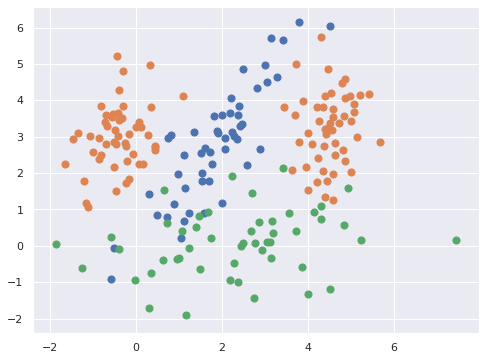

In [ ]:
# Utilisation des deux stratégies multi-classe ("one vs. one", "one vs. rest")
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

# Pour calculer une matrice de confusion
from sklearn.metrics import confusion_matrix

trainX, trainY, testX, testY=td.generate_data(4)

td.show_data_2D(trainX,trainY)

svc = svm.SVC(C=0.1, kernel='poly', degree=2, max_iter=10000)


In [ ]:
# METTRE VOTRE CODE ICI



<div class="alert alert-block alert-success">
QUESTION: Commentez les différences de comportement du classifieur.
</div>

**Réponse**

### Activité 2.2: classification de chiffres manuscrits


<div class="alert alert-block alert-info">

On dispose d’un ensemble d’images de données de chiffres manuscrits. L’objectif de cette partie est de se mettre dans les conditions d’une compétition de reconnaissance des formes pour produire les meilleures performances sur l’ensemble de test pour lequel on ne connaît pas la vraie classe (« vérité terrain » = ground truth en anglais). Dans le cadre de ce TD, et pour situer le niveau de performances, on évaluera les classifieurs sur la base de test, mais elle ne devra pas être utilisée pour l'apprentissage.

<br><br>
Définissez une stratégie de recherche de paramètres par validation croisée sur les noyaux et leurs paramètres. Rem: on peut obtenir plus de 95% de reconnaissance sur la base de test. Visualisez quelques exemples de données mal classées.

</div>

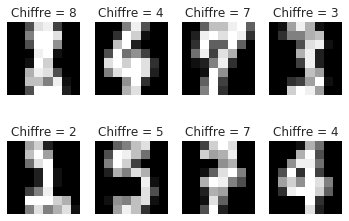

In [ ]:
#Chargement des données
from sklearn import datasets

images, classes = datasets.load_digits(return_X_y = True)
n_samples = len(images)
data = images.reshape((n_samples, -1))

#Constitution des bases d'apprentissage et de test
ntrain = 800
trainX = data[:ntrain,:]
trainY = classes[:ntrain]
testX = data[ntrain:-1,:]
testY = classes[ntrain:-1]

#Visu des données
fig, axes = plt.subplots(2, 4)

for ax in axes.flat:
    isample = np.random.randint(trainX.shape[0])
    ax.imshow(trainX[isample].reshape(8,8),cmap='gray')
    ax.set_title("Chiffre = {}".format(trainY[isample]))
    ax.axis('off')

plt.show() 

In [ ]:
# METTRE VOTRE CODE ICI



In [ ]:
# Visualisation des données mal classées

ibad=(predY != testY).nonzero()[0]

# METTRE VOTRE CODE ICI



NameError: ignored